# Arctic Lake Bathymetry
#### Filetering by geography - ICESat ATL13
#### Melanie Frost
#### 4/18/2023

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import geopandas as gpd
import pandas as pd
import rioxarray as rxr
import rasterio

In [2]:
#pip install earthpy

In [3]:
from shapely.geometry import box
import earthpy as et
import seaborn as sns
import earthpy.plot as ep
from rasterio.plot import plotting_extent

In [4]:
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

In [5]:
df = pd.read_csv('data/lakes_clean.csv')
df.head(5)

,cycle,id,size,type,cloud_flag,bkgrd_flag,shallow_flag,wind_flag,rgt,seg_lat,...,qual2,qual3,orientation,beg_lat,beg_lon,end_lat,end_lon,sc_orient,quality_metric,beam_strength
0,4,2546,4,1,0,1.0,0,1,266,67.520551,...,0,0,NaN,67.519020,-148.468245,67.519020,-148.468773,0.0,1.000000,Strong
1,4,2546,4,1,0,1.0,0,1,266,67.520859,...,2,0,NaN,67.520765,-148.468775,67.520765,-148.468833,0.0,0.971698,Strong
2,4,2546,4,1,0,1.0,0,1,266,67.521048,...,2,0,NaN,67.520953,-148.468833,67.520953,-148.468889,0.0,0.981132,Strong
3,4,2546,4,1,0,1.0,0,1,266,67.521236,...,5,0,NaN,67.521142,-148.468891,67.521142,-148.468950,0.0,0.954128,Strong
4,4,2546,4,1,0,1.0,0,1,266,67.521432,...,3,0,NaN,67.521337,-148.468950,67.521337,-148.469007,0.0,0.953271,Strong


In [6]:
icesat = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.seg_lon, df.seg_lat))
icesat = icesat.set_crs("EPSG:4326")
icesat.head()

,cycle,id,size,type,cloud_flag,bkgrd_flag,shallow_flag,wind_flag,rgt,seg_lat,...,qual3,orientation,beg_lat,beg_lon,end_lat,end_lon,sc_orient,quality_metric,beam_strength,geometry
0,4,2546,4,1,0,1.0,0,1,266,67.520551,...,0,NaN,67.519020,-148.468245,67.519020,-148.468773,0.0,1.000000,Strong,POINT (-148.46871 67.52055)
1,4,2546,4,1,0,1.0,0,1,266,67.520859,...,0,NaN,67.520765,-148.468775,67.520765,-148.468833,0.0,0.971698,Strong,POINT (-148.46880 67.52086)
2,4,2546,4,1,0,1.0,0,1,266,67.521048,...,0,NaN,67.520953,-148.468833,67.520953,-148.468889,0.0,0.981132,Strong,POINT (-148.46886 67.52105)
3,4,2546,4,1,0,1.0,0,1,266,67.521236,...,0,NaN,67.521142,-148.468891,67.521142,-148.468950,0.0,0.954128,Strong,POINT (-148.46892 67.52124)
4,4,2546,4,1,0,1.0,0,1,266,67.521432,...,0,NaN,67.521337,-148.468950,67.521337,-148.469007,0.0,0.953271,Strong,POINT (-148.46898 67.52143)


In [7]:
# Import data
AKNS_shape_path = os.path.join('data', 'ns_boundary', "nsb_boundary.shp")

AKNS_shape = gpd.read_file(AKNS_shape_path)


# Are the data all in the same crs?
print("AKNS", AKNS_shape.crs)
print("icesat", icesat.crs)

#set CRS of AKNS to WGS84 latitude-longitude projection/authority code "EPSG:4326".
AKNS_shape = AKNS_shape.to_crs("EPSG:4326")
print("AKNS", AKNS_shape.crs)

AKNS epsg:3338
icesat EPSG:4326
AKNS EPSG:4326


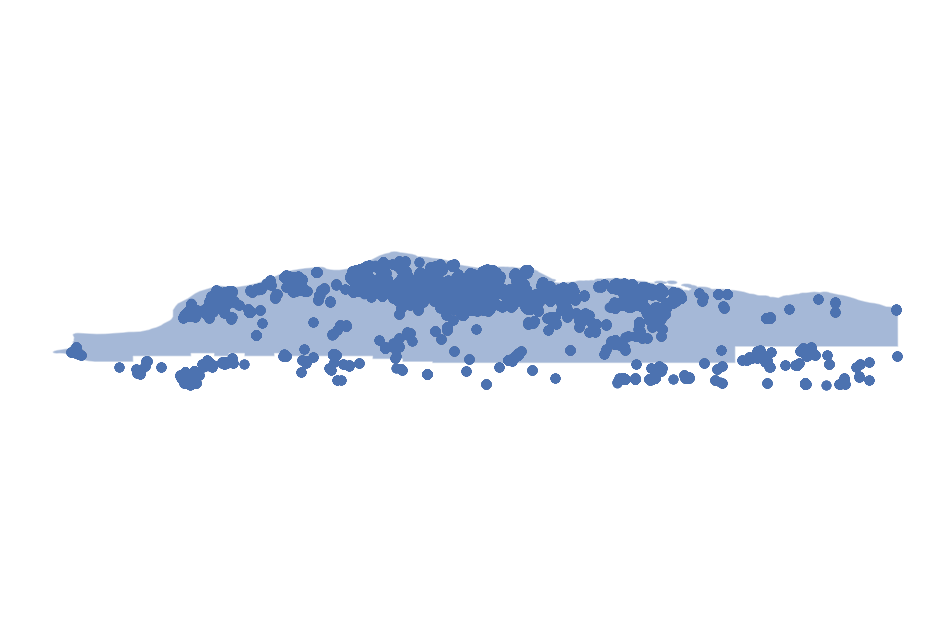

In [8]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

AKNS_shape.plot(alpha=.5,
                         ax=ax)

icesat.plot(ax=ax)

plt.axis('equal')
ax.set_axis_off()
plt.show()

In [9]:
# Clip the data using GeoPandas clip
points_clip = gpd.clip(icesat, AKNS_shape)

# View the first 6 rows and a few select columns
points_clip.head()
points_clip.shape

(90837, 30)

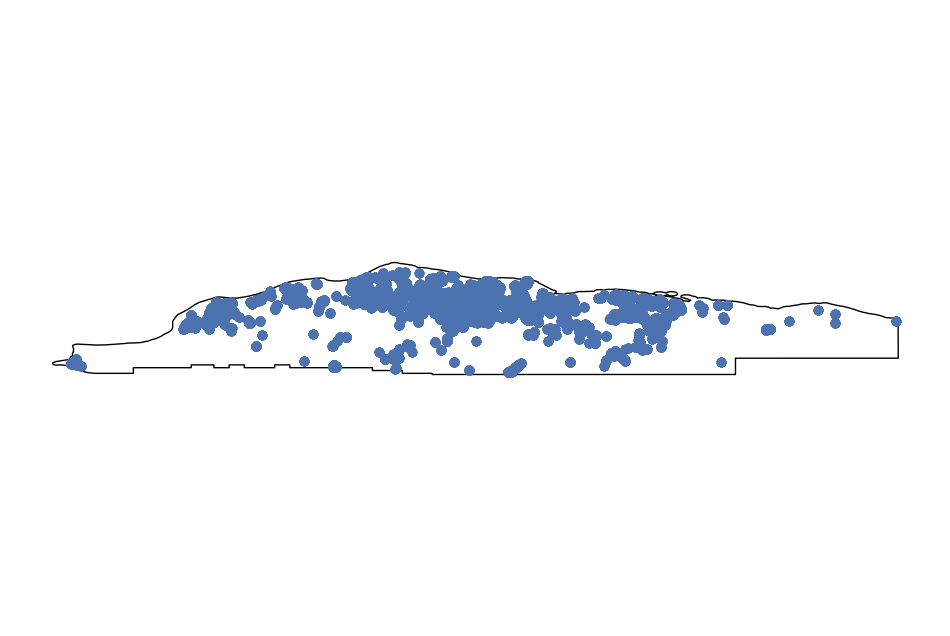

In [10]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

AKNS_shape.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax)

points_clip.plot(ax=ax)

ax.set_axis_off()
plt.axis('equal')

# # Label each point - note this is just shown here optionally but is not required for your homework
# points_clip.apply(lambda x: ax.annotate(s=x['name'],
#                                         xy=x.geometry.coords[0],
#                                         xytext=(6, 6), textcoords="offset points",
#                                         backgroundcolor="white"),
#                   axis=1)
plt.show()

In [11]:
points_clip.to_file("data/ICESat_clean.shp")

/explore/nobackup/people/mfrost2/.nccstmp/ipykernel_1650539/4193631941.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  points_clip.to_file("data/ICESat_clean.shp")


In [12]:
points_clip.shape

(90837, 30)